In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import json
import io

## Idle latency vs Average download speed (Jan 2011 - Jul 2023)

In [9]:
latency = pd.read_csv("data_rtt_max_monthly/Idle latency Percentage.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
# Define bins and labels for the ranges
# bins = [0, 40, 45, 50, 100]
val = merge_df["Percentage <100ms"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]

labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
merge_df['PercentRange'] = pd.cut(merge_df['Percentage <100ms'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df[""].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

In [5]:
merge_df["Percentage <100ms"].describe()

count    145.000000
mean      93.232966
std        2.000726
min       84.950000
25%       92.020000
50%       94.060000
75%       94.590000
max       95.800000
Name: Percentage <100ms, dtype: float64

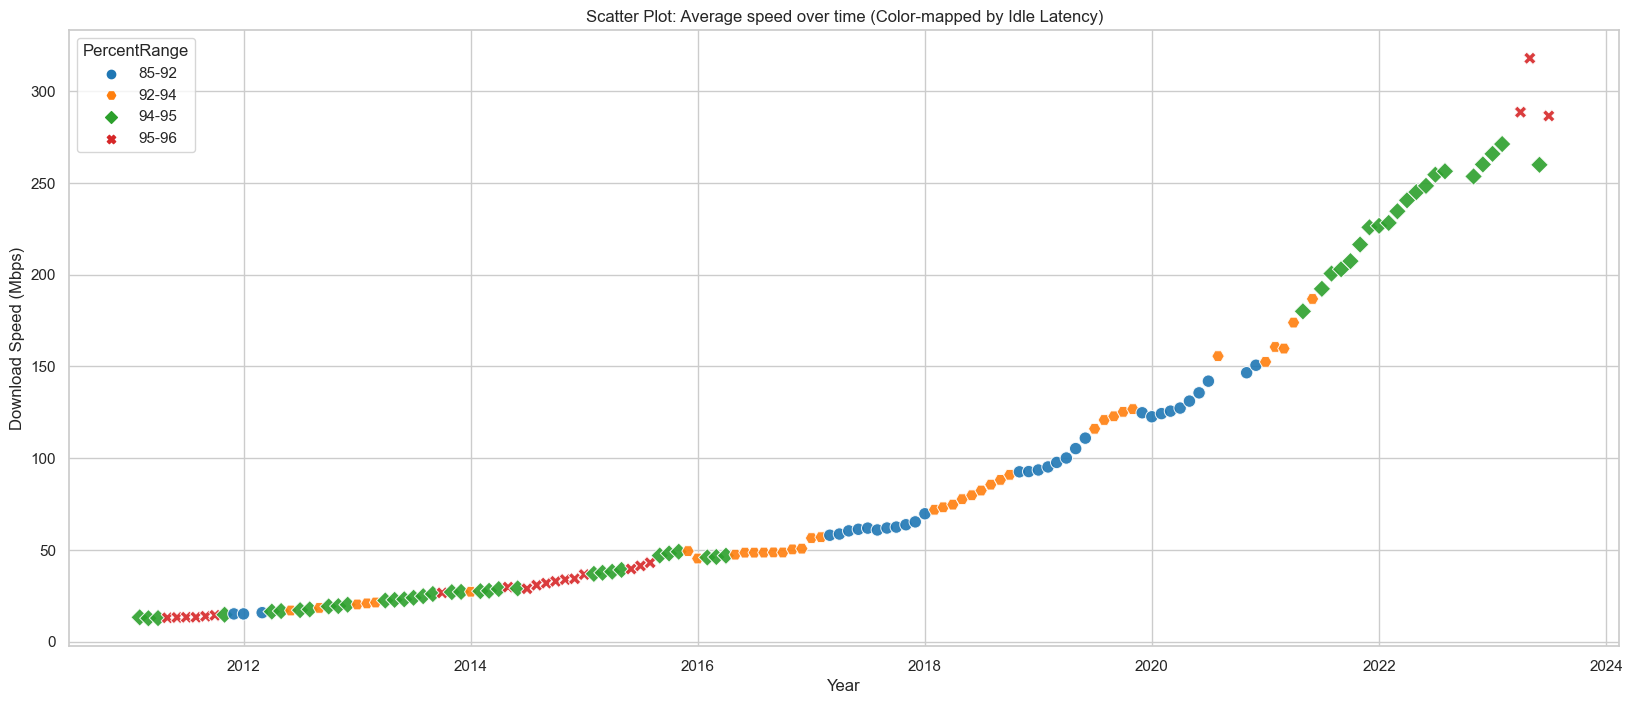

In [8]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='PercentRange', style='PercentRange' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Idle Latency)')
plt.show()

## Downstream LUL vs Average download speed (Jan 2011 - Jul 2023)

In [2]:
latency = pd.read_csv("data_rtt_max_monthly/downstream LUL Percentage.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

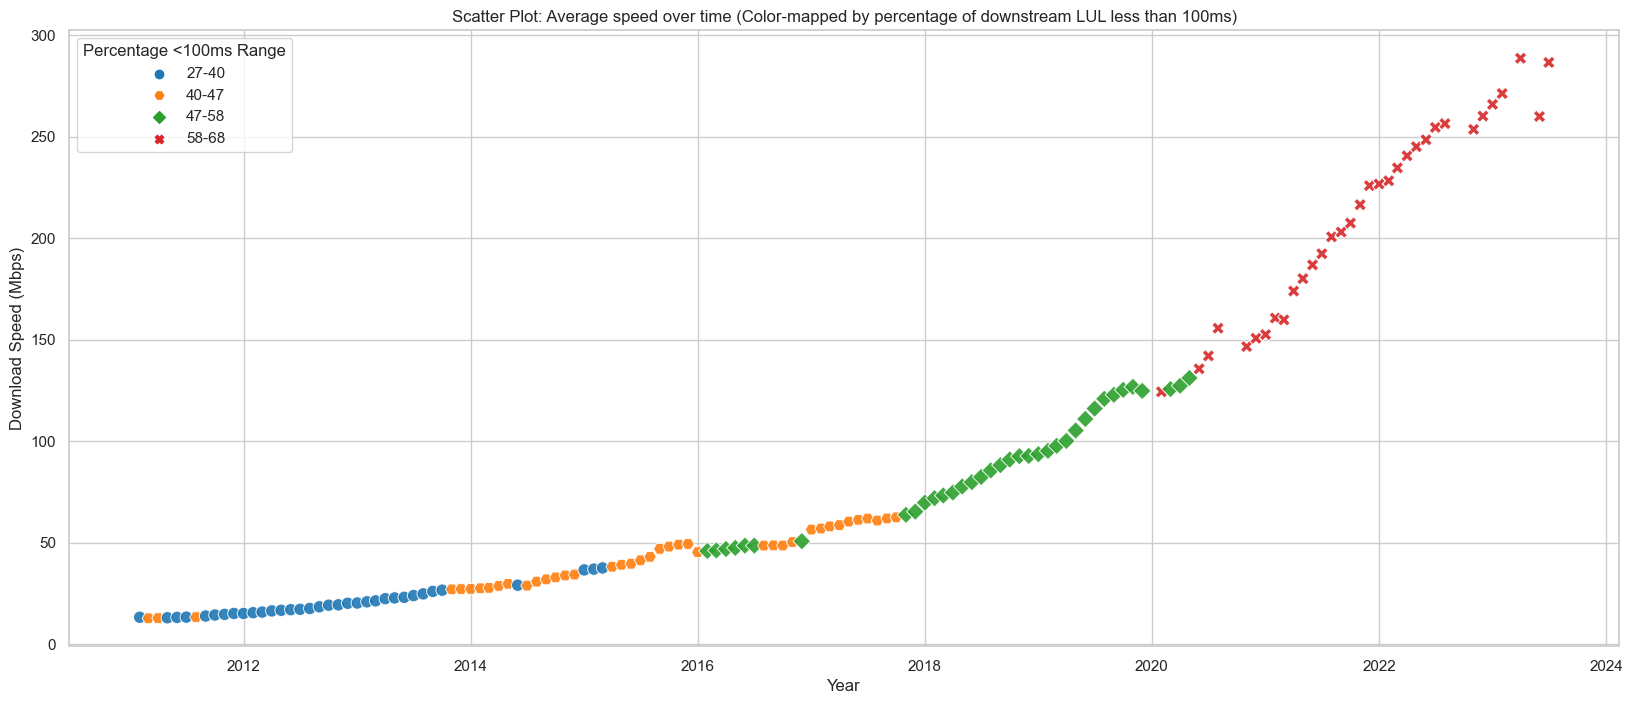

In [4]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL less than 100ms)')
plt.show()

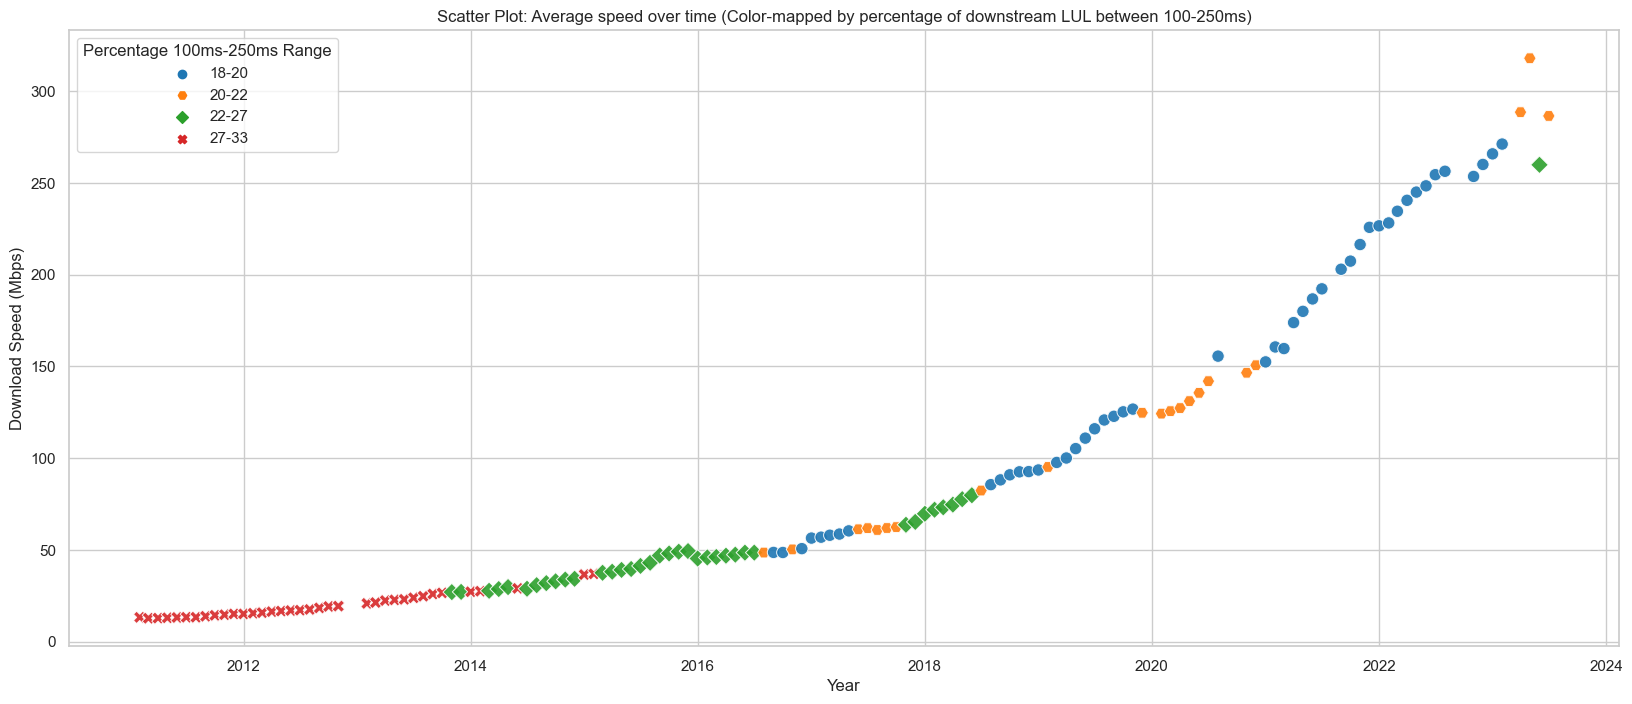

In [5]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL between 100-250ms)')
plt.show()

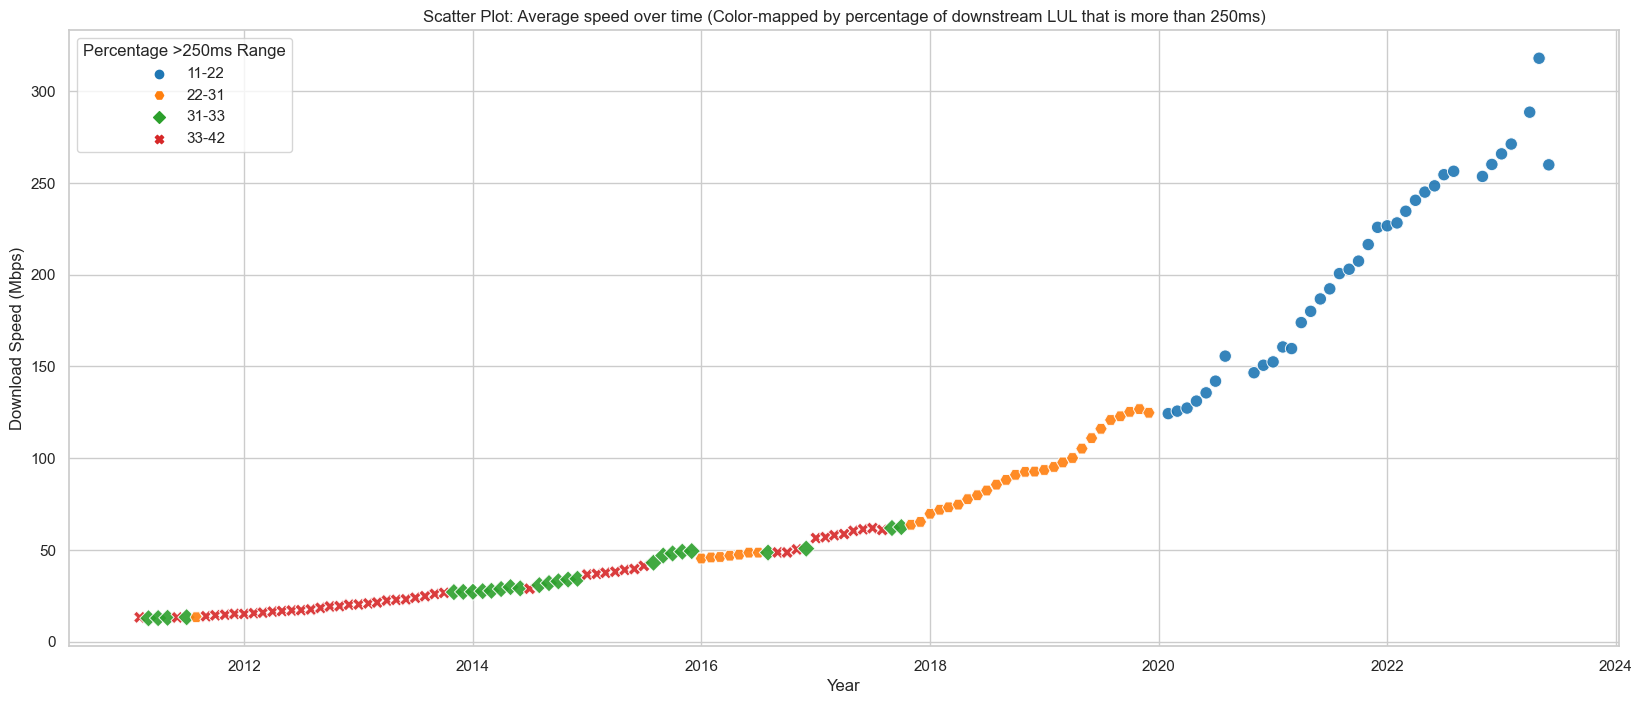

In [6]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL that is more than 250ms)')
plt.show()

## Upstream LUL vs Average upload speed (Jan 2011 - Jul 2023)

In [7]:
latency = pd.read_csv("data_rtt_max_monthly/upstream LUL Percentage.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

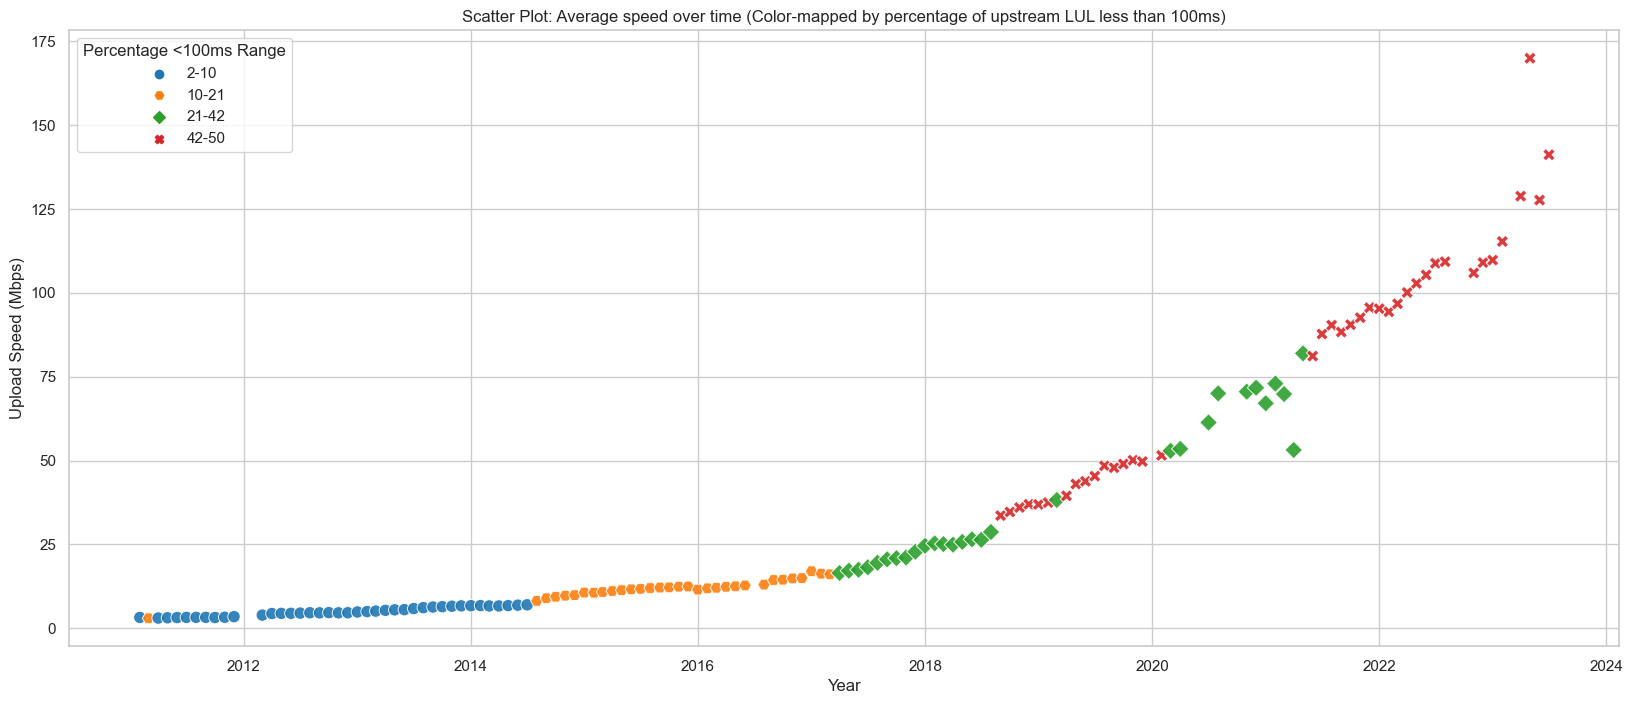

In [9]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL less than 100ms)')
plt.show()

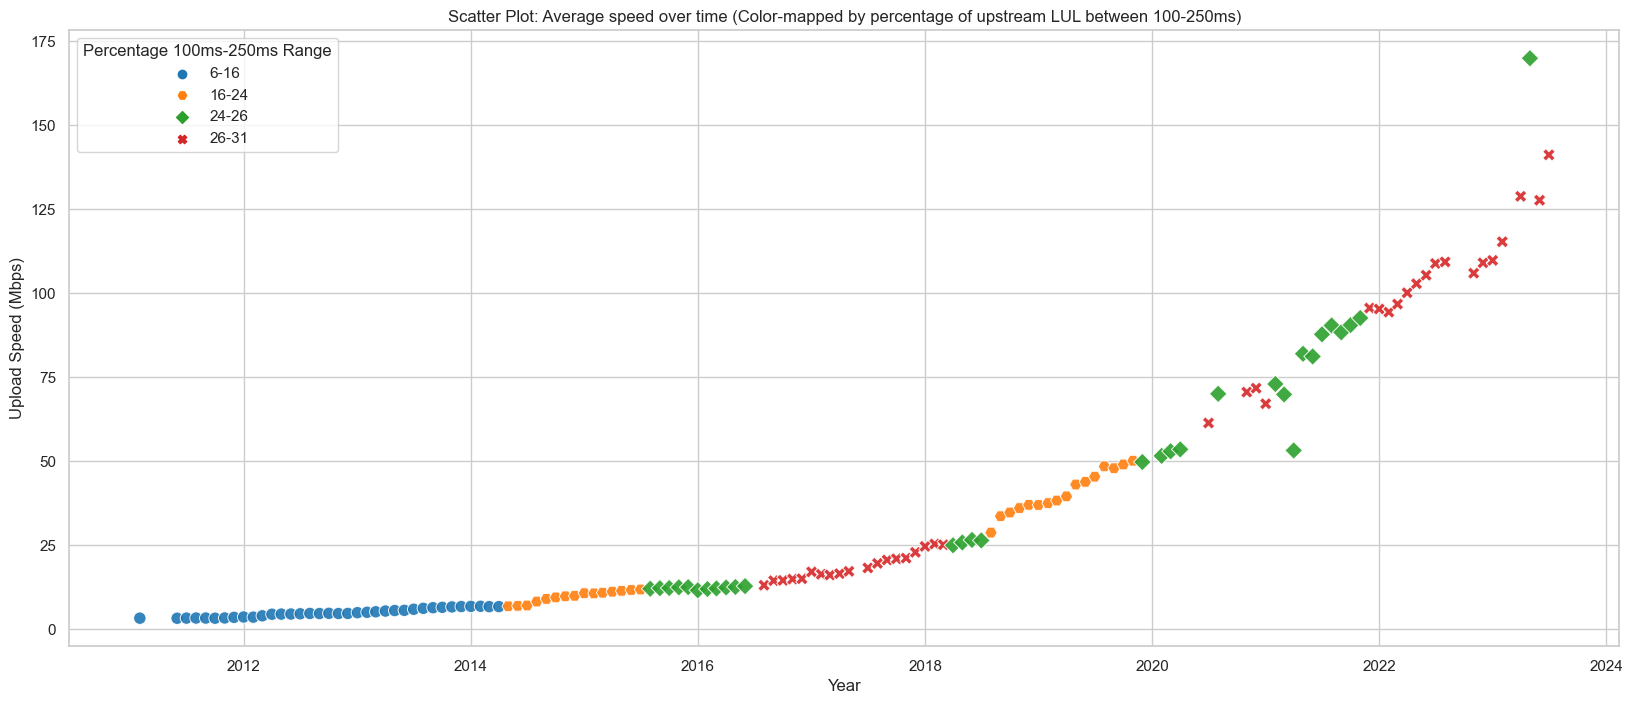

In [10]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL between 100-250ms)')
plt.show()

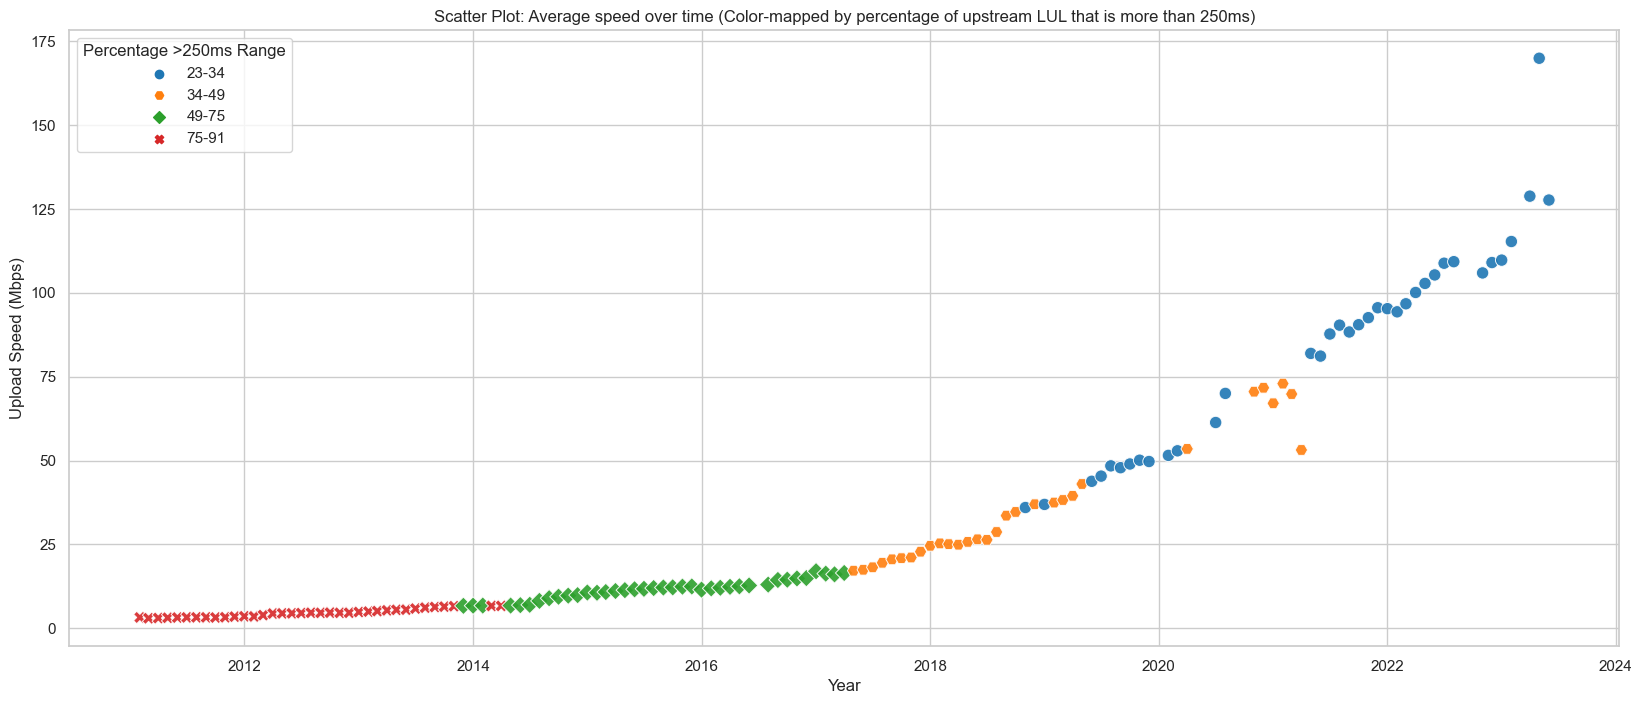

In [11]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL that is more than 250ms)')
plt.show()

# Cable

## Downstream LUL vs Average download speed for Cable (Jan 2011 - Jul 2023)

In [12]:
latency = pd.read_csv("data_rtt_max_monthly/downstream LUL Percentage-Cable.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

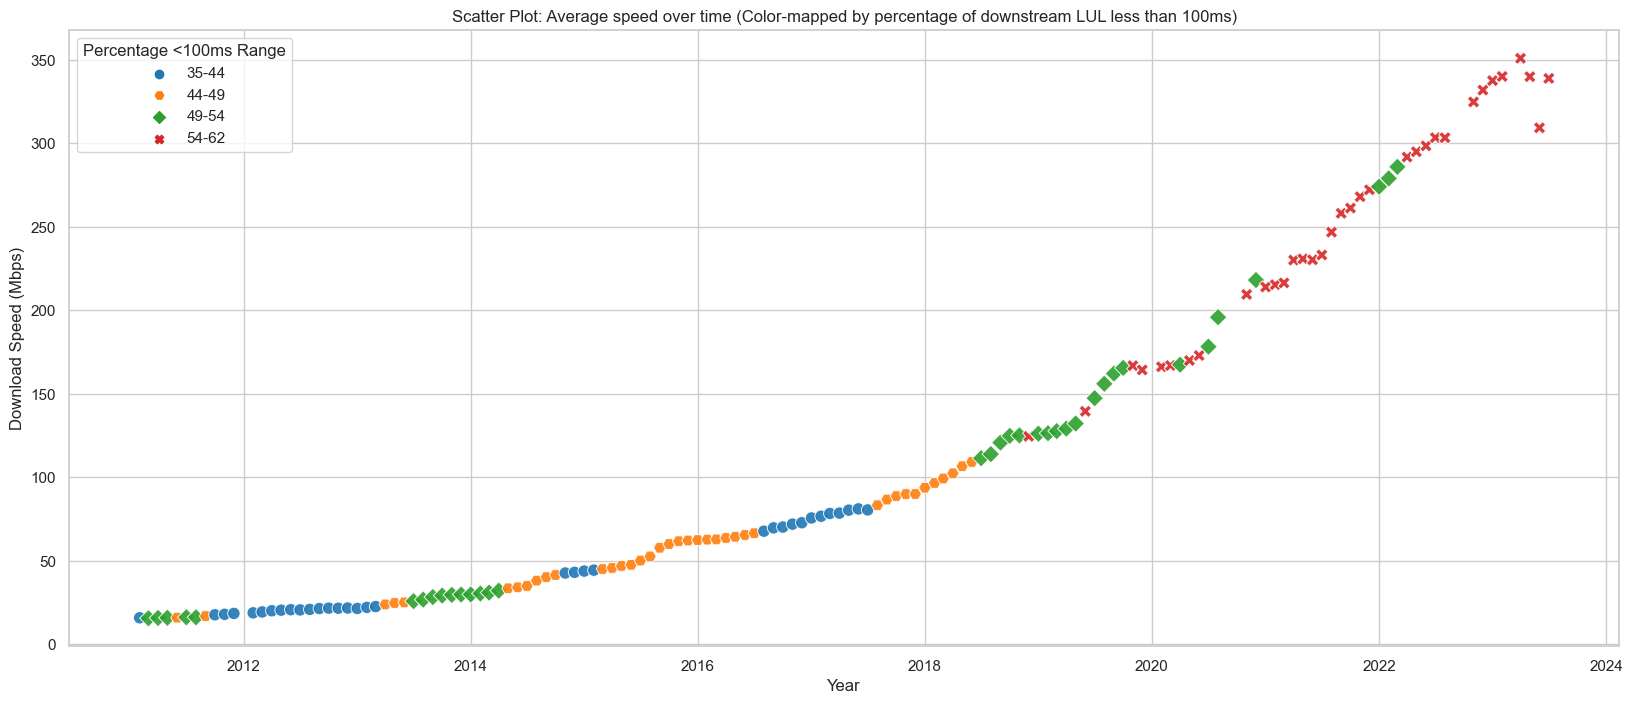

In [13]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL less than 100ms)')
plt.show()

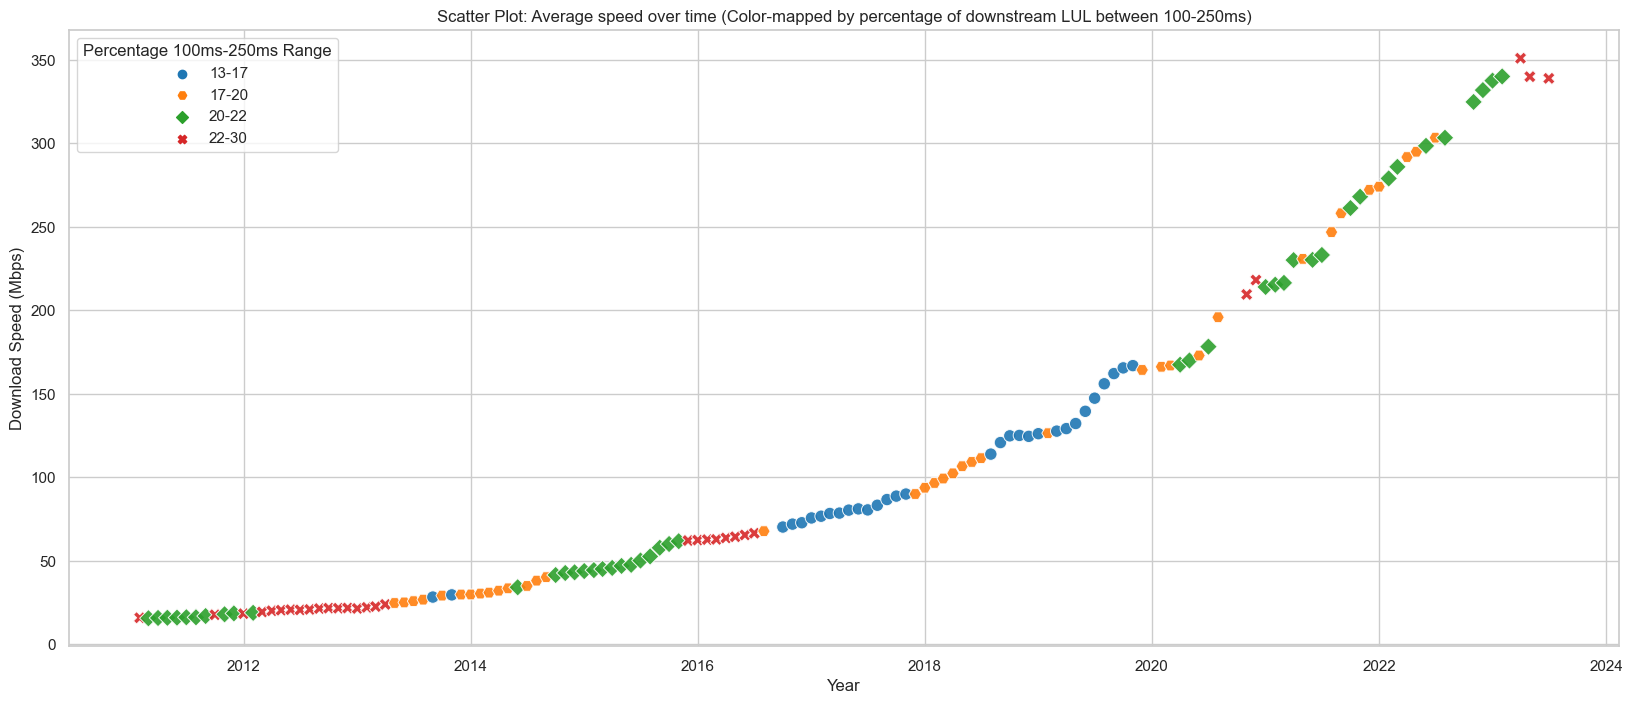

In [14]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL between 100-250ms)')
plt.show()

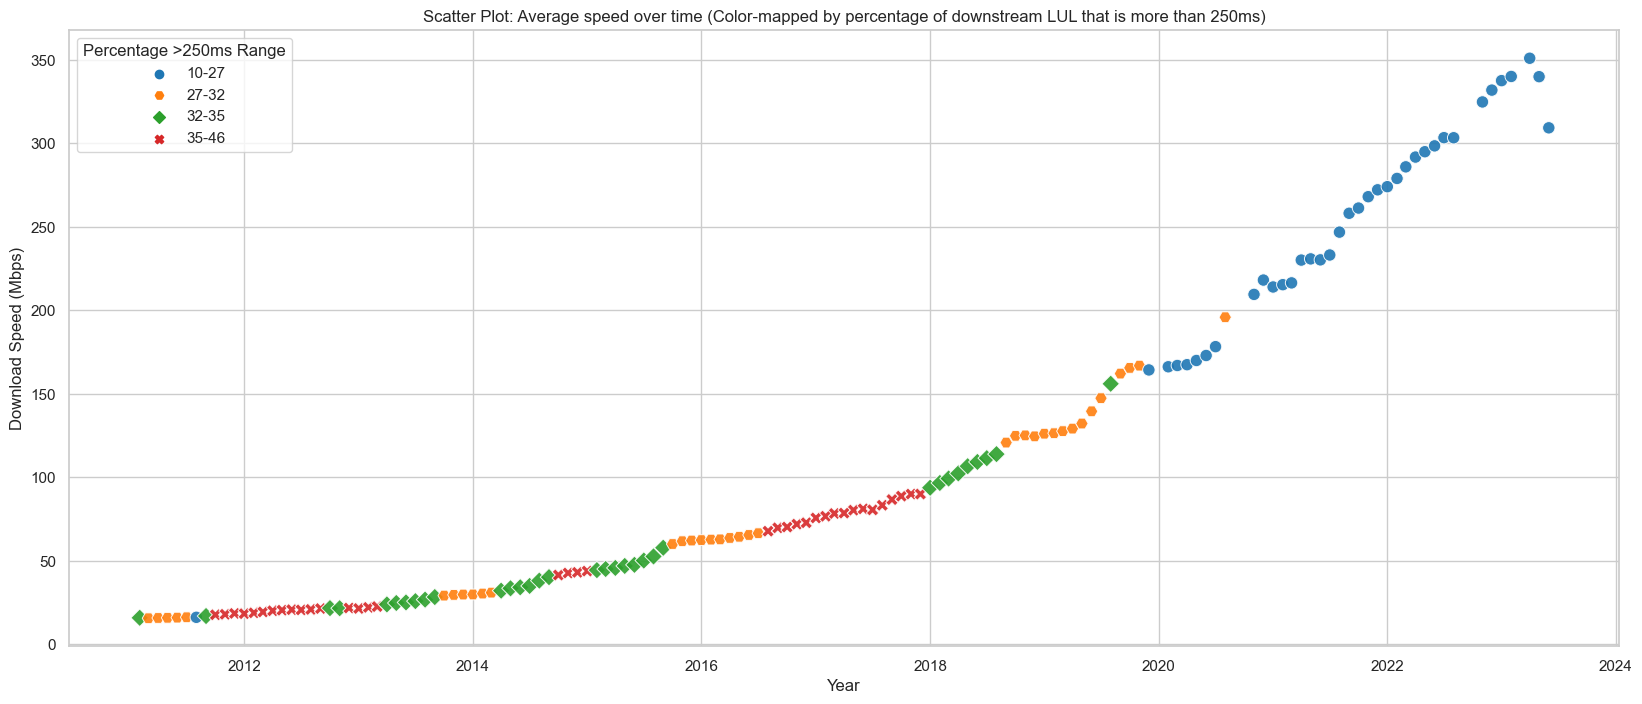

In [15]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL that is more than 250ms)')
plt.show()

## Upstream LUL vs Average upload speed (Jan 2011 - Jul 2023)

In [16]:
latency = pd.read_csv("data_rtt_max_monthly/upstream LUL Percentage-Cable.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

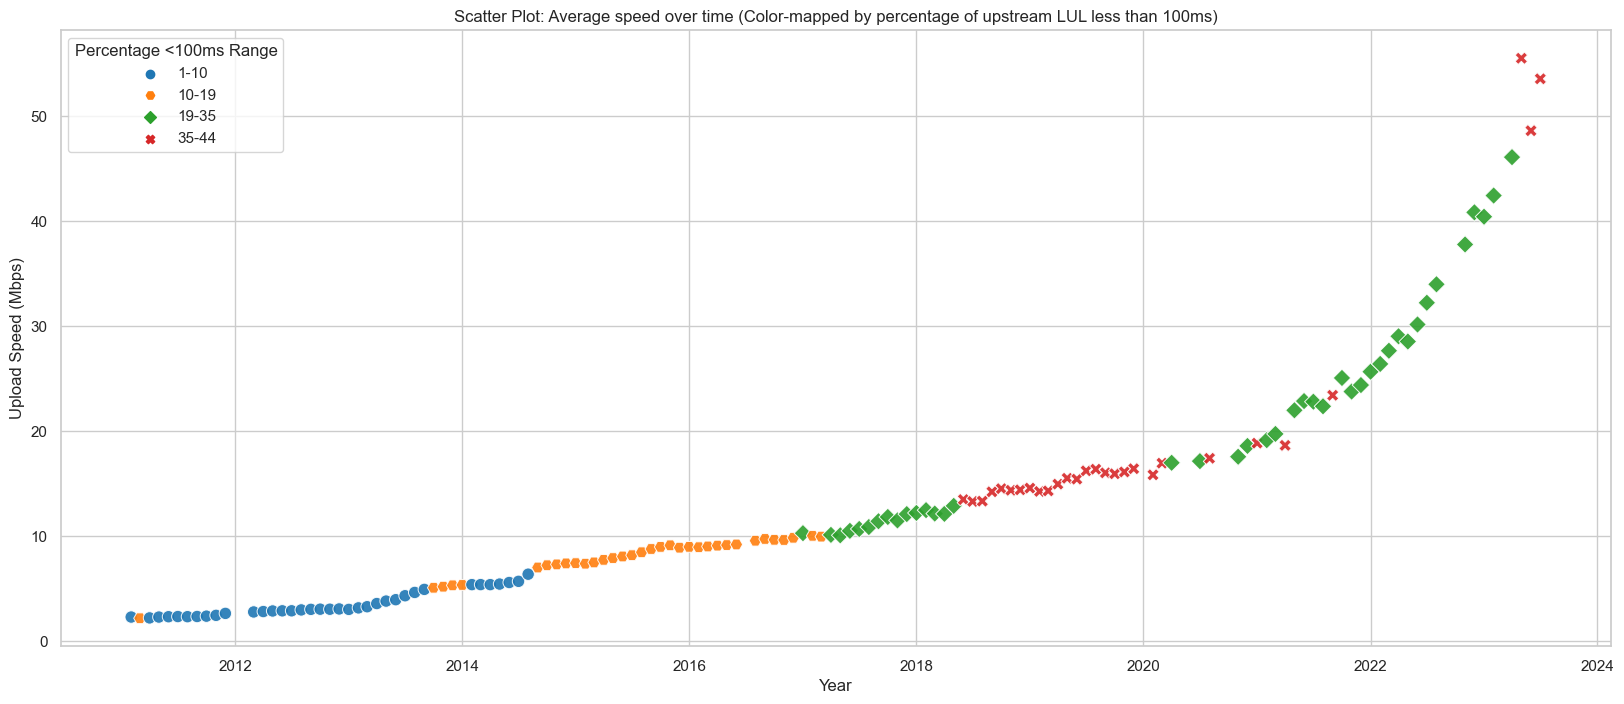

In [17]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL less than 100ms)')
plt.show()

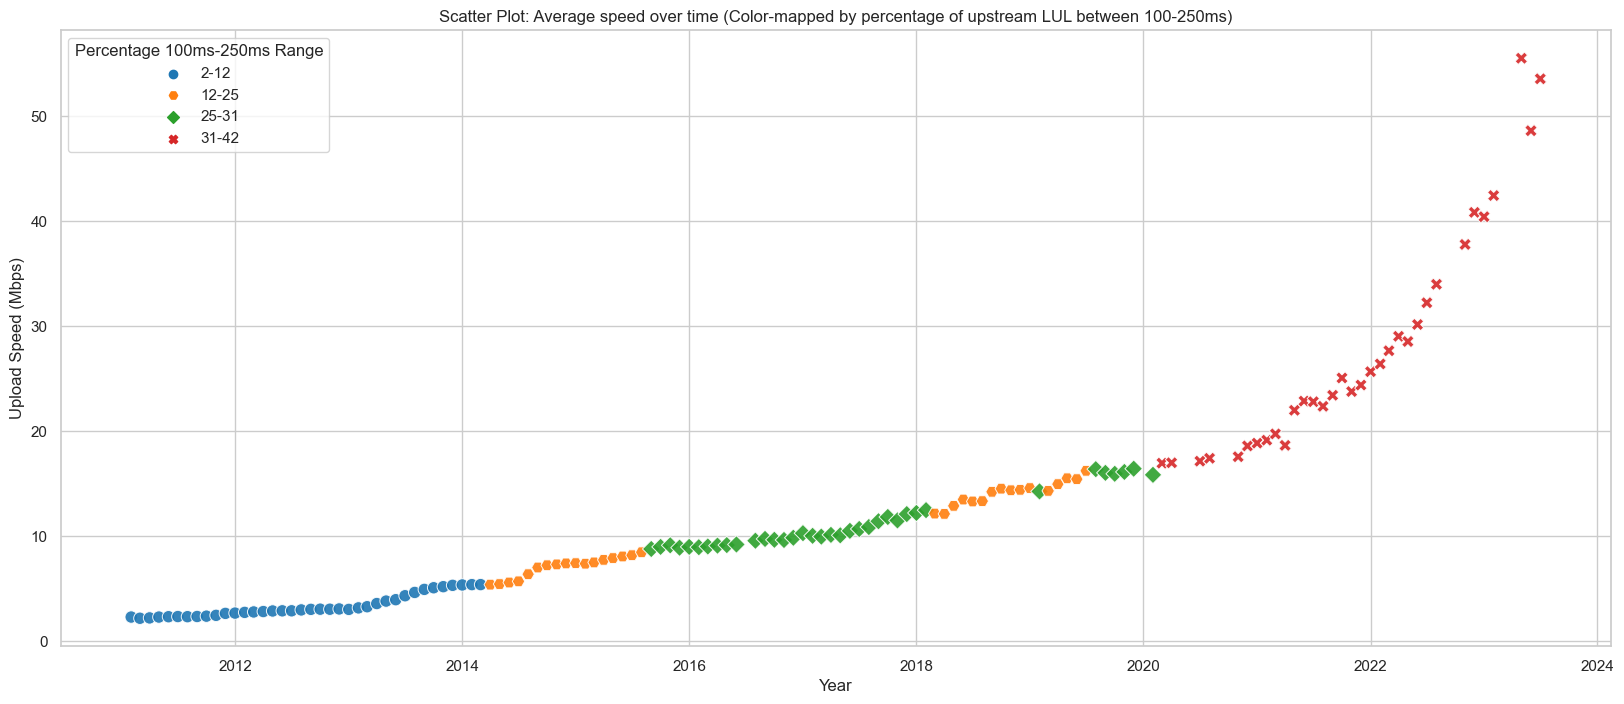

In [18]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL between 100-250ms)')
plt.show()

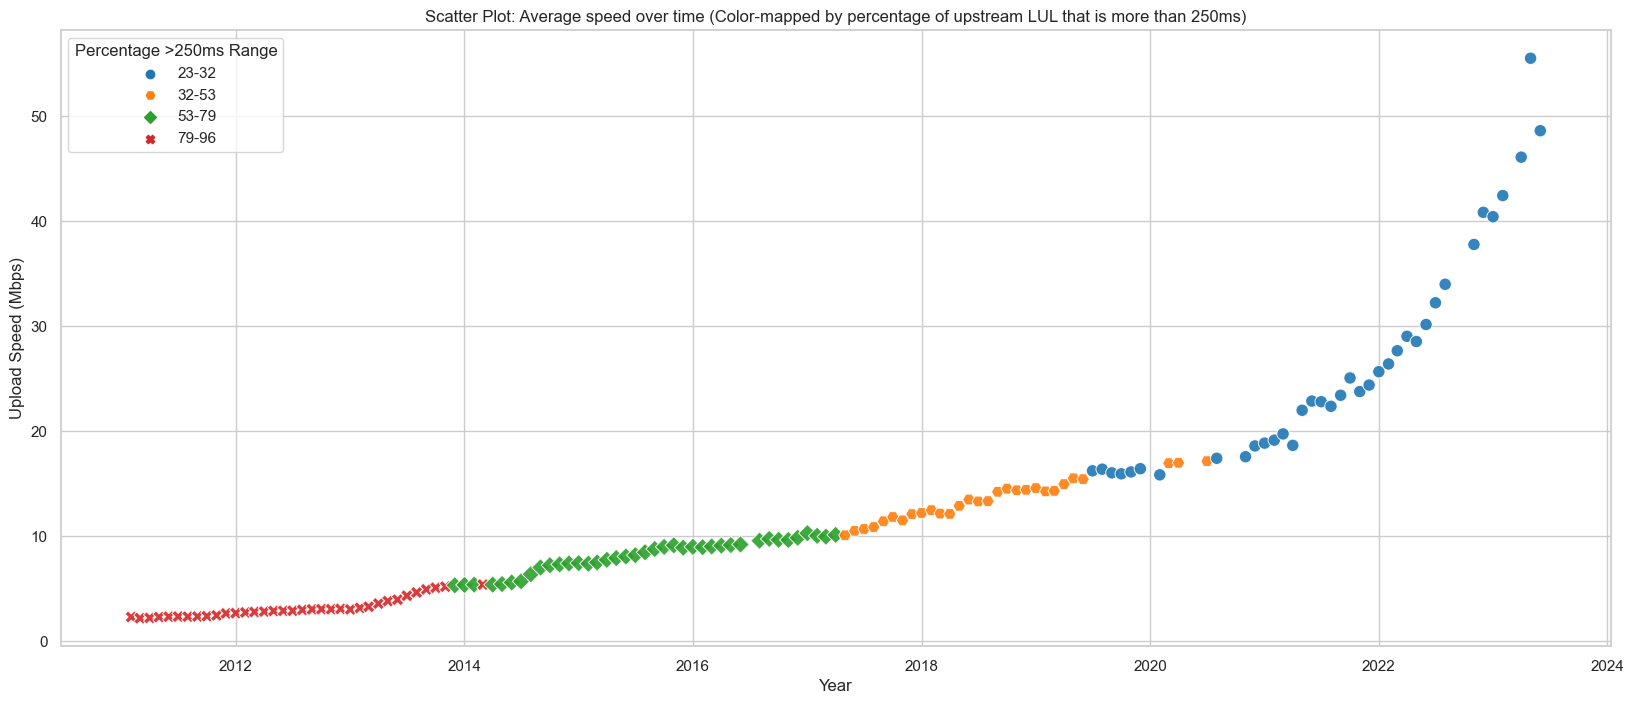

In [19]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL that is more than 250ms)')
plt.show()

# Fiber

## Downstream LUL vs Average download speed for Fiber (Jan 2011 - Jul 2023)

In [20]:
latency = pd.read_csv("data_rtt_max_monthly/downstream LUL Percentage-Fiber.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Fiber.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

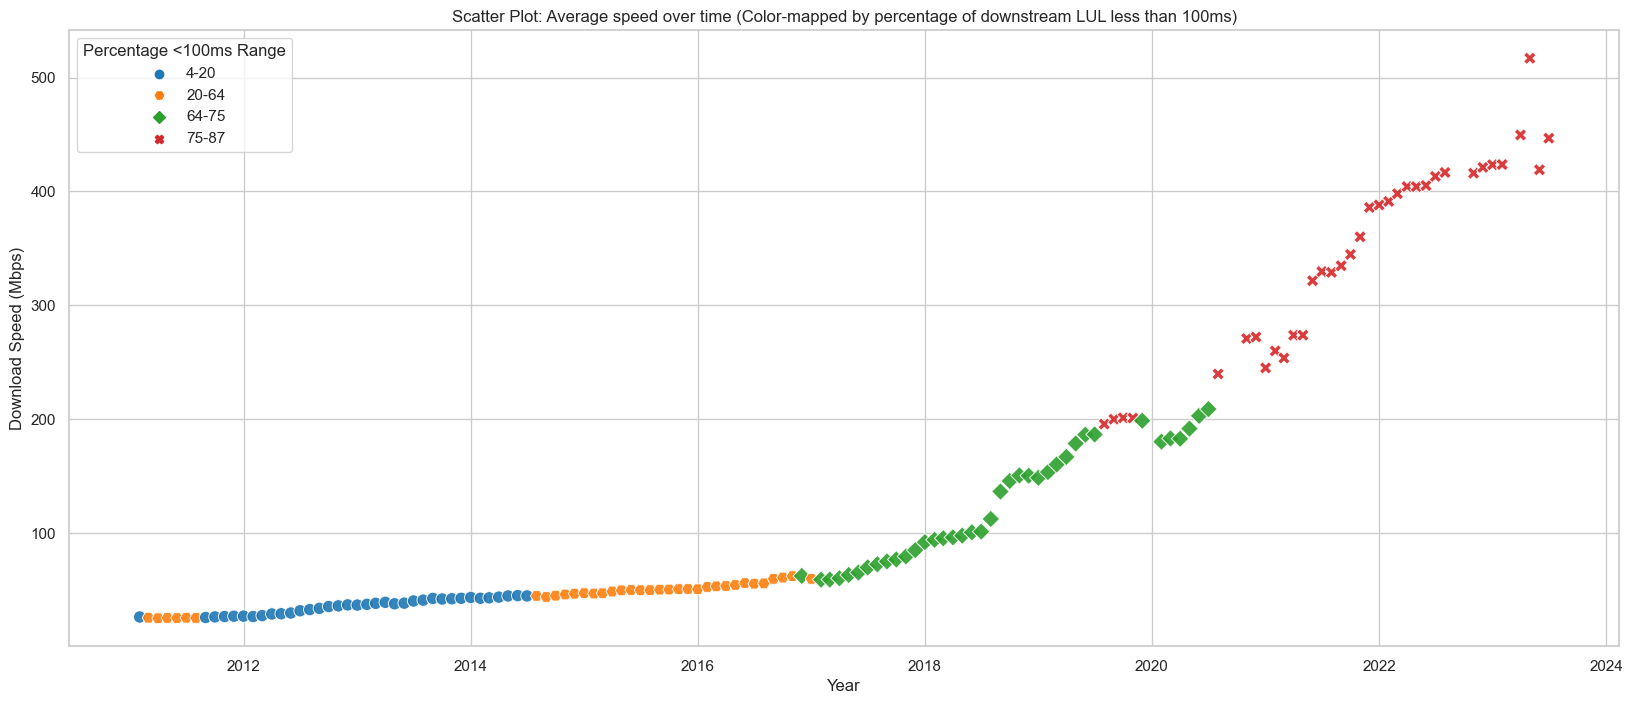

In [21]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL less than 100ms)')
plt.show()

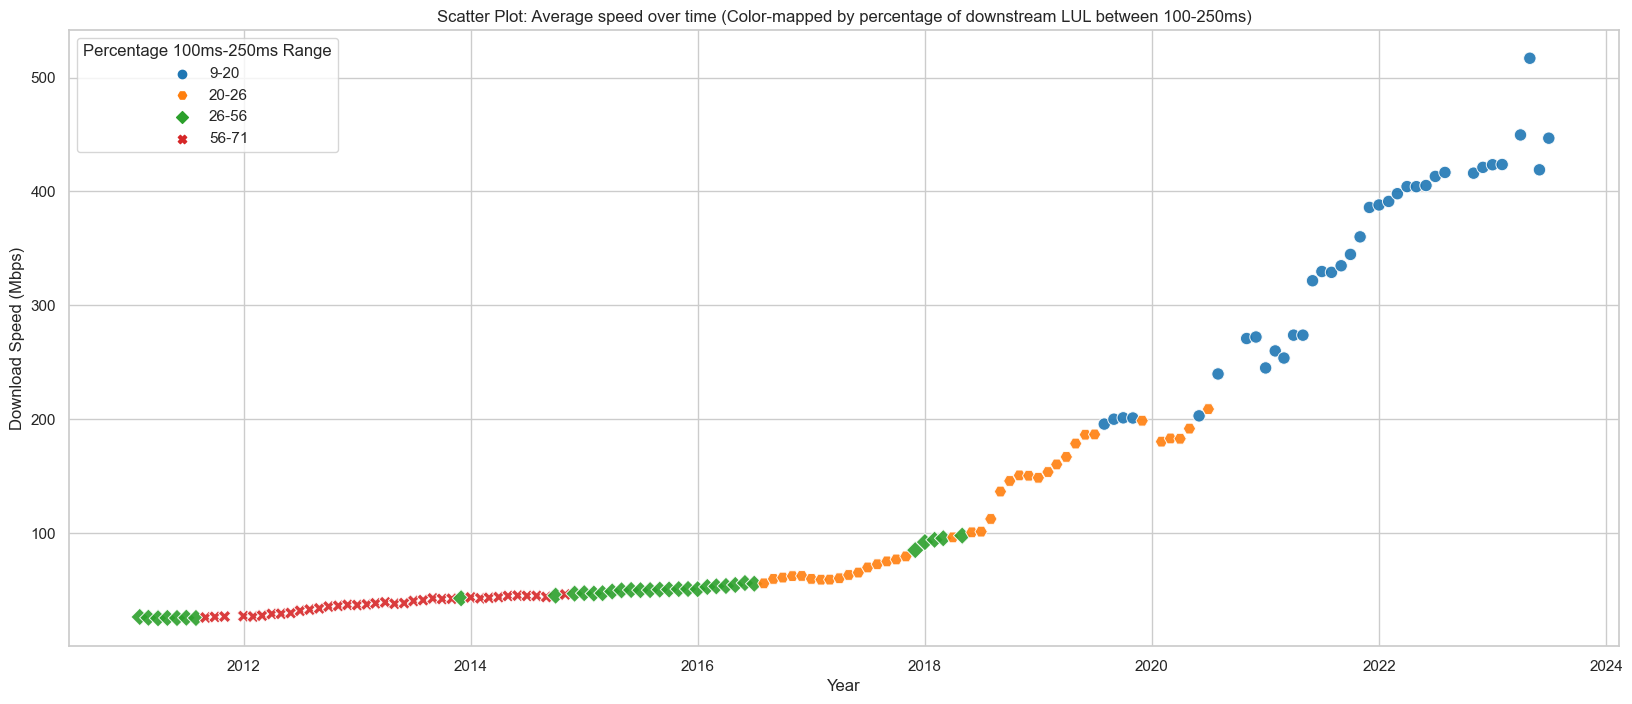

In [22]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL between 100-250ms)')
plt.show()

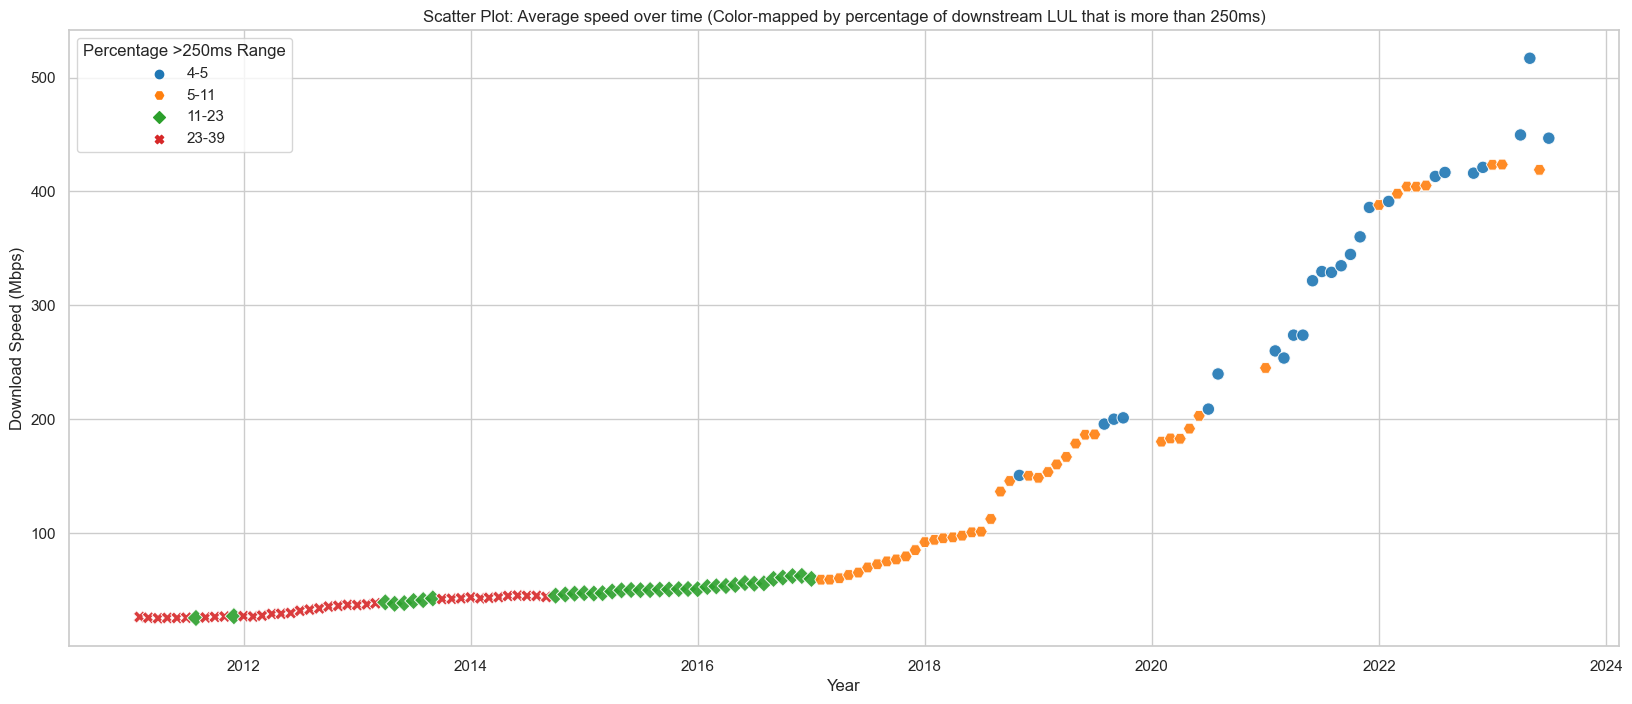

In [23]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL that is more than 250ms)')
plt.show()

## Upstream LUL vs Average upload speed for Fiber (Jan 2011 - Jul 2023)

In [24]:
latency = pd.read_csv("data_rtt_max_monthly/upstream LUL Percentage-Fiber.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed-Fiber.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

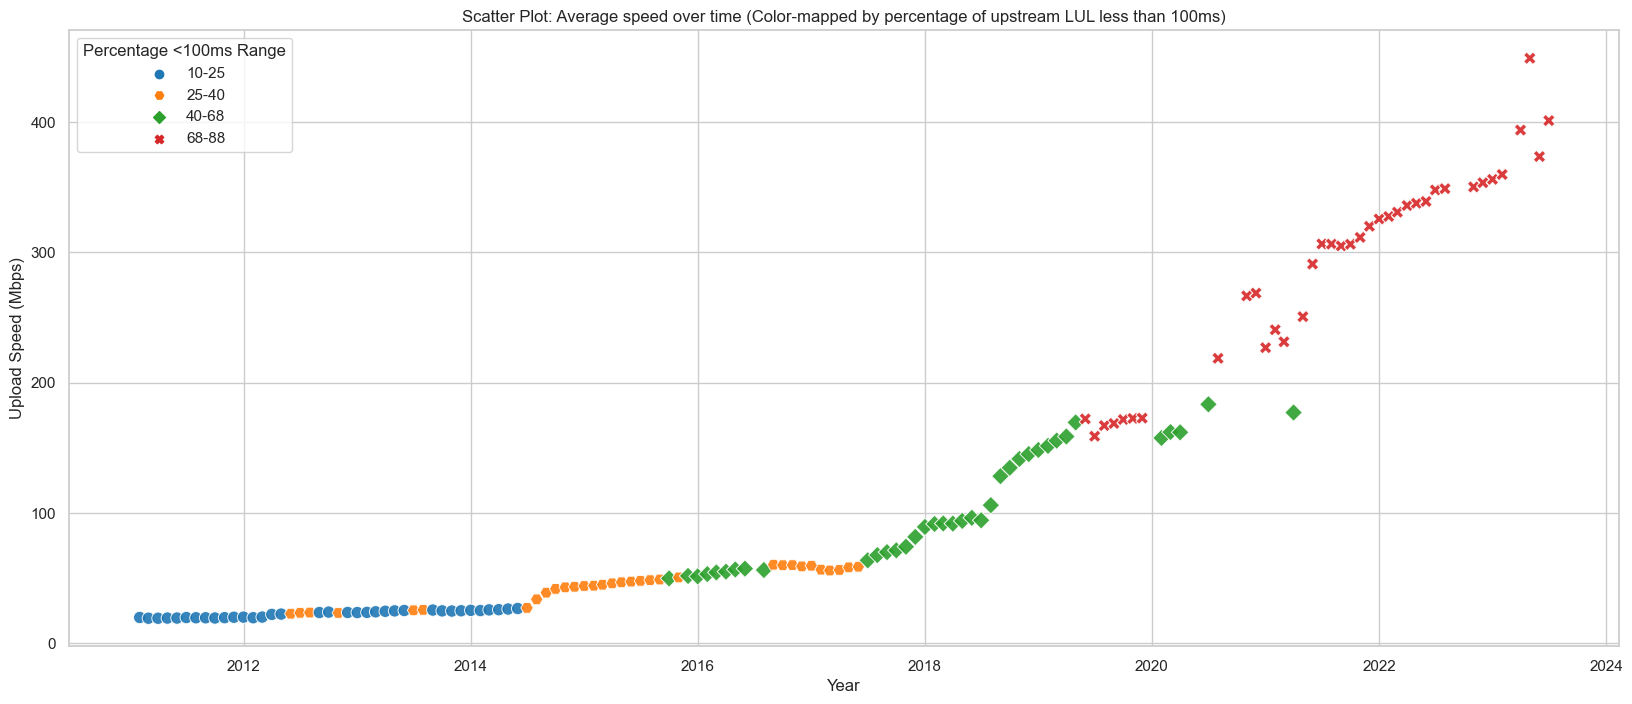

In [25]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL less than 100ms)')
plt.show()

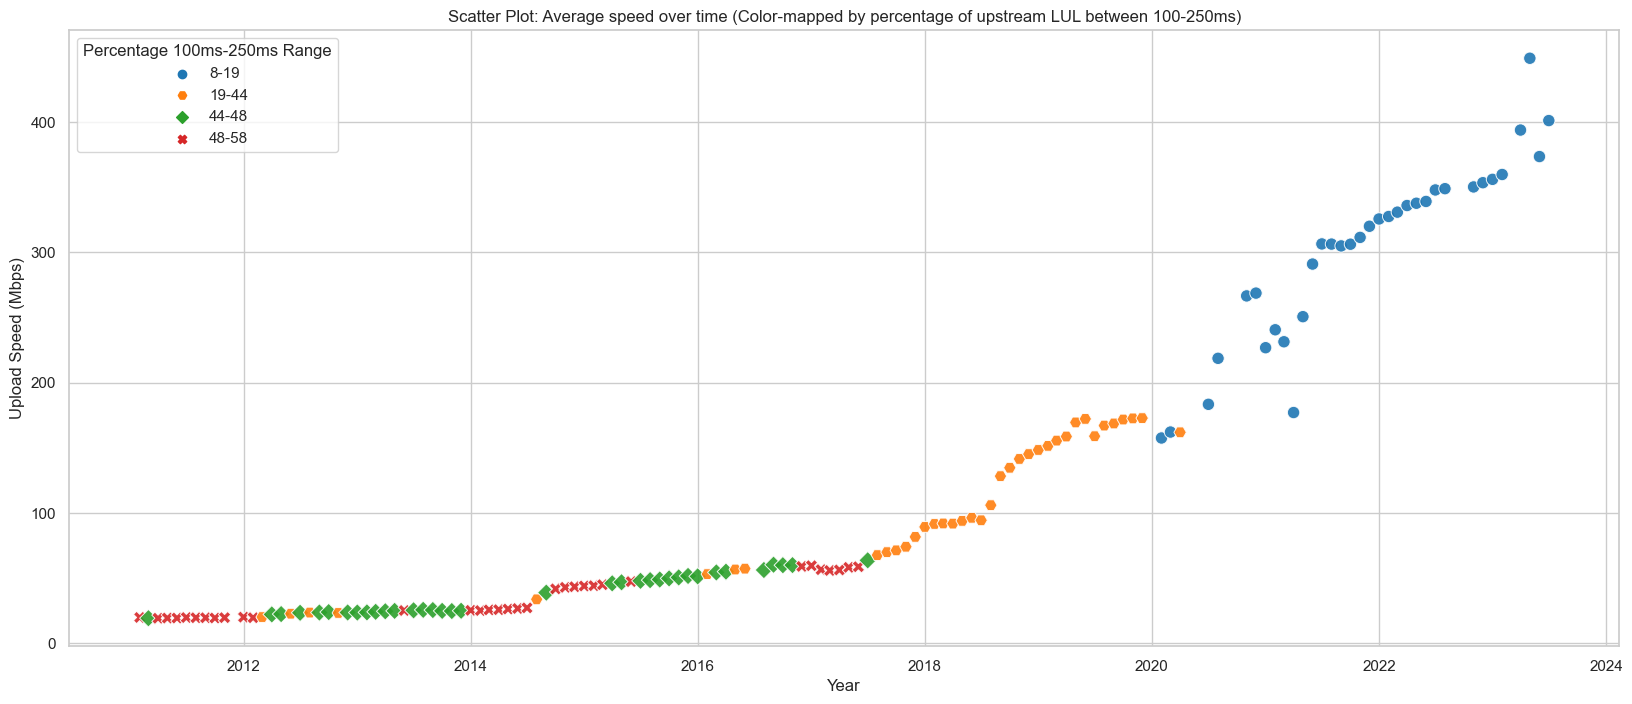

In [26]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL between 100-250ms)')
plt.show()

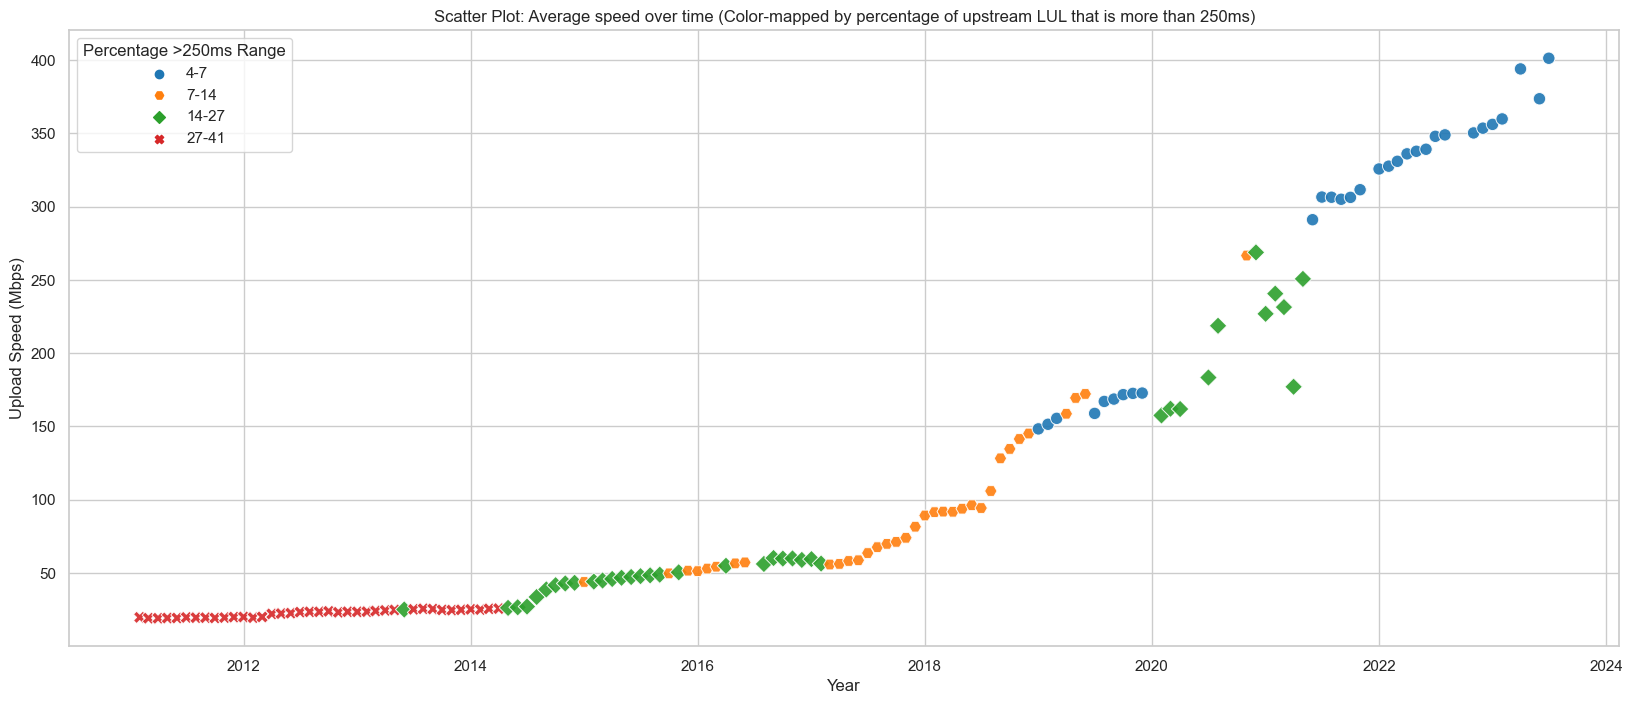

In [27]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL that is more than 250ms)')
plt.show()

# DSL

## Downstream LUL vs Average download speed for DSL (Jan 2011 - Jul 2023)

In [28]:
latency = pd.read_csv("data_rtt_max_monthly/downstream LUL Percentage-DSL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-DSL.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

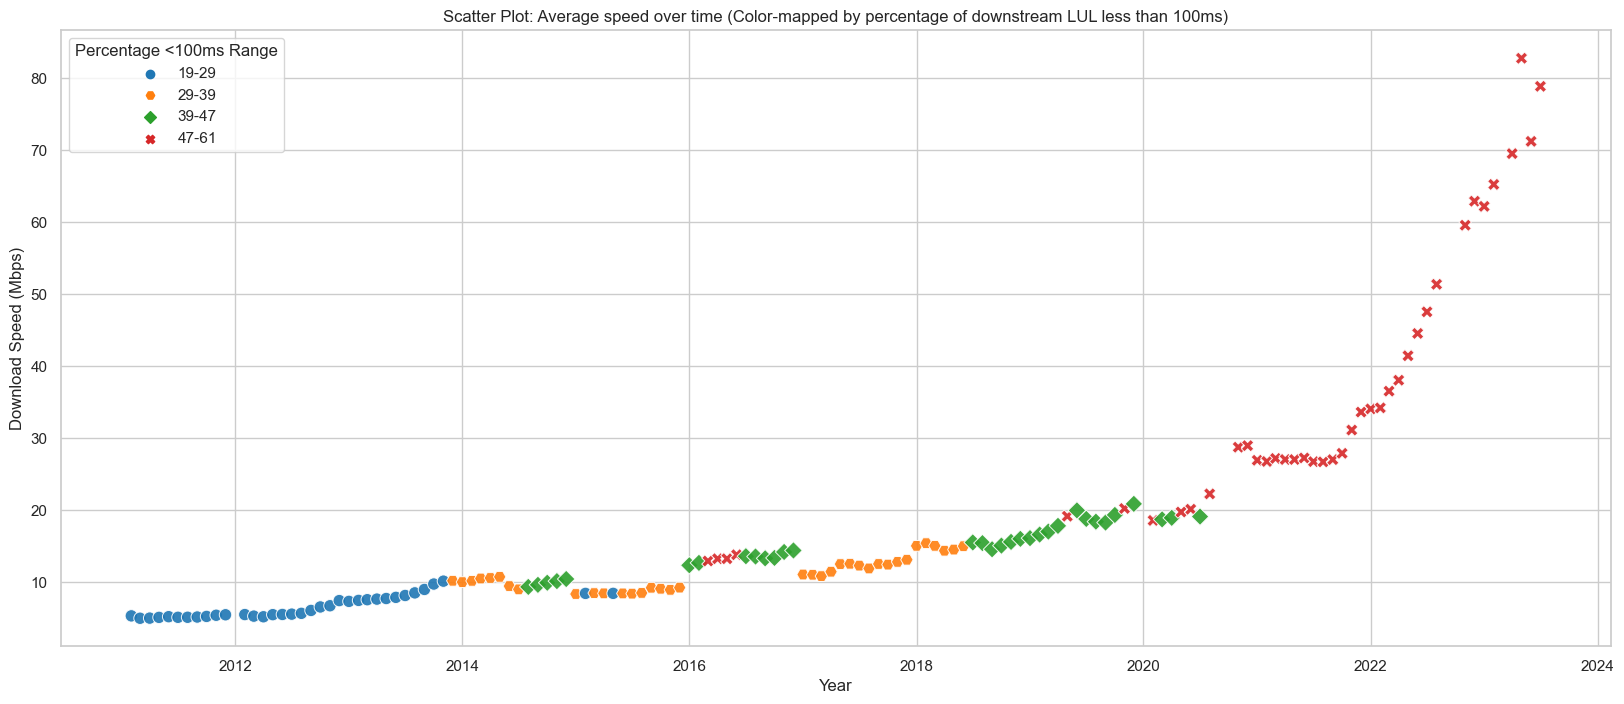

In [29]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL less than 100ms)')
plt.show()

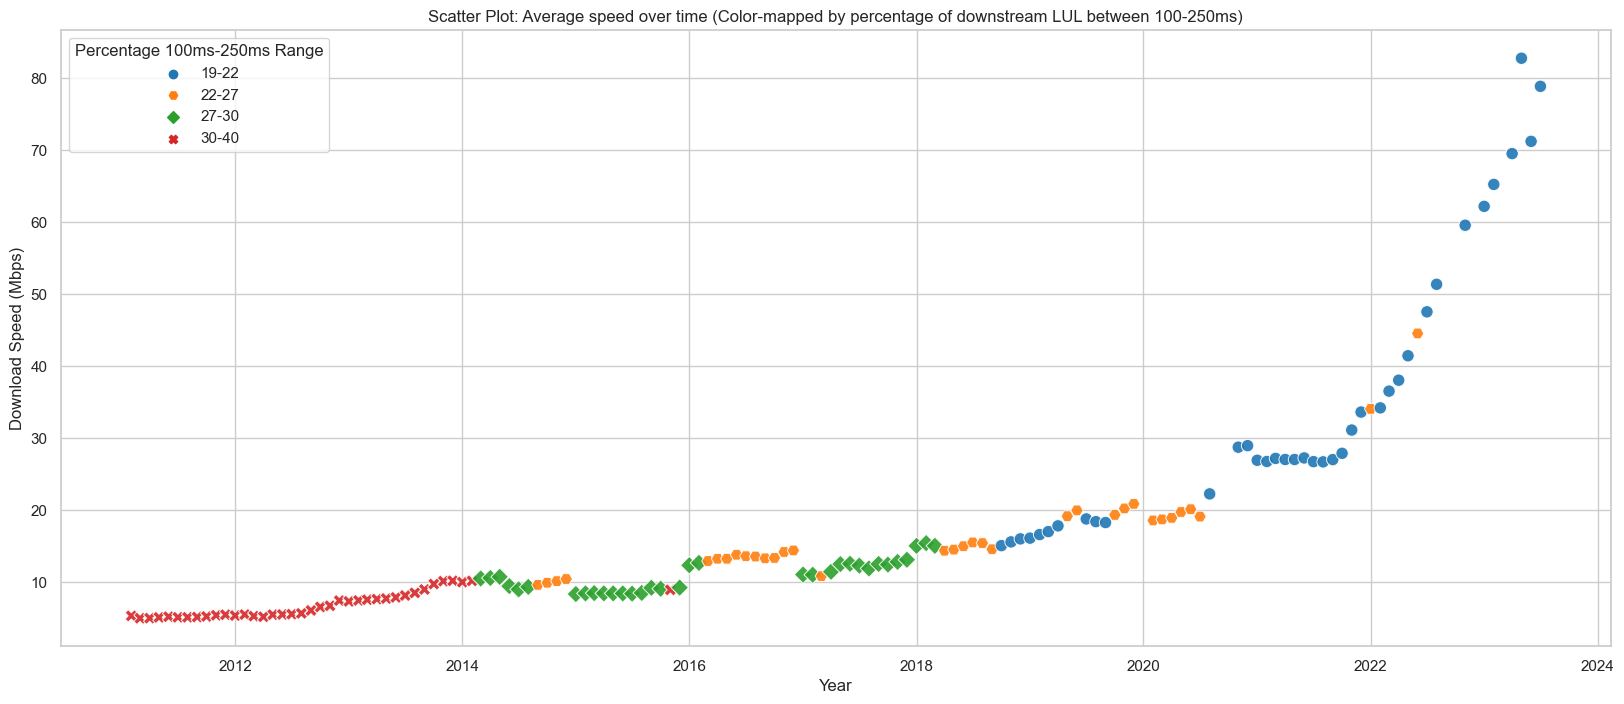

In [30]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL between 100-250ms)')
plt.show()

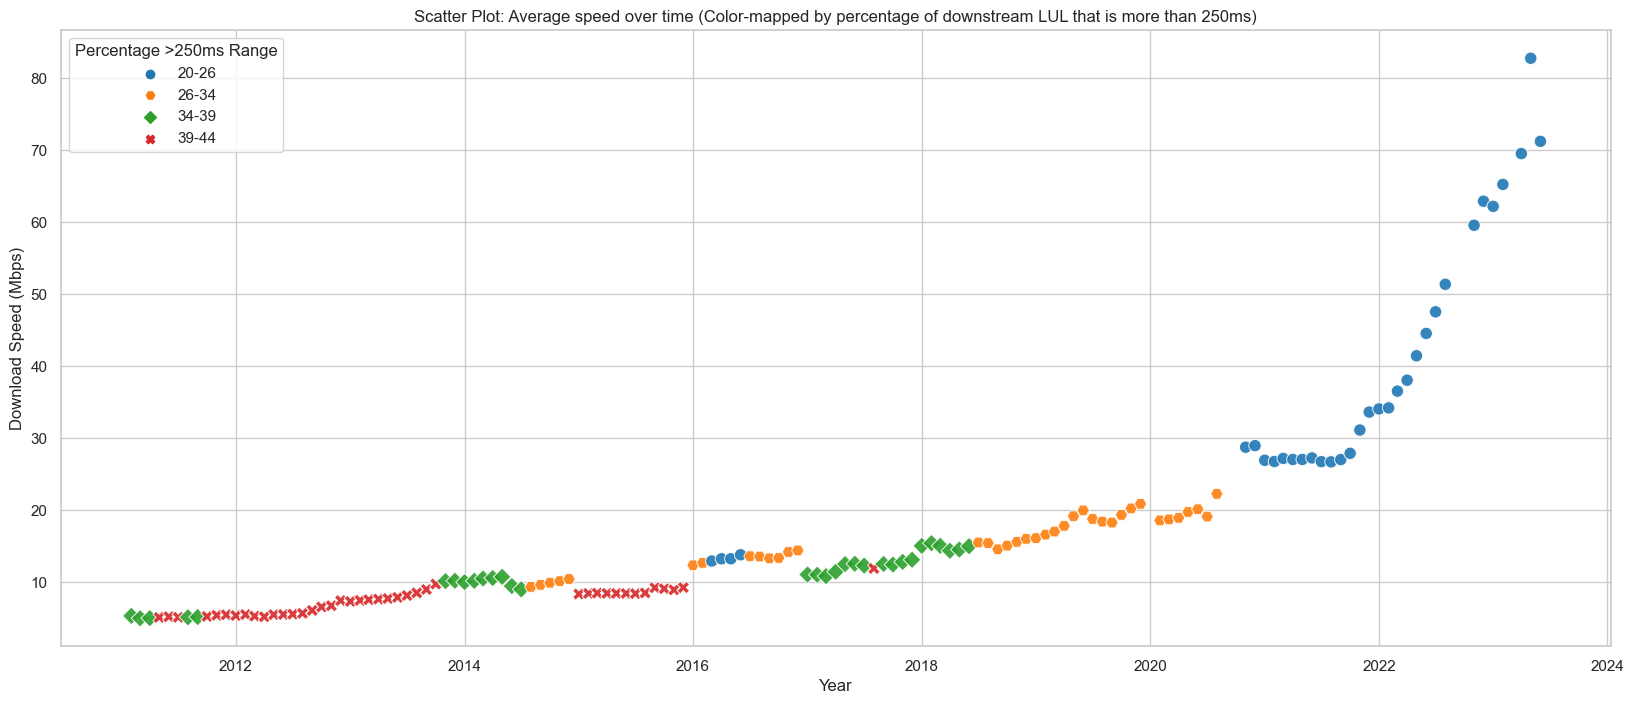

In [31]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of downstream LUL that is more than 250ms)')
plt.show()

## Upstream LUL vs Average upload speed for DSL (Jan 2011 - Jul 2023)

In [32]:
latency = pd.read_csv("data_rtt_max_monthly/upstream LUL Percentage-DSL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed-DSL.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
merge_df['Percentage <100ms'] = merge_df['Percentage <100ms'].str.replace("%","").astype(float)
merge_df['Percentage 100ms-250ms'] = merge_df['Percentage 100ms-250ms'].str.replace("%","").astype(float)
merge_df['Percentage >250ms'] = merge_df['Percentage >250ms'].str.replace("%","").astype(float)
merge_df.tail()
for col in ['Percentage <100ms', 'Percentage 100ms-250ms', 'Percentage >250ms']:
    val = merge_df[col].describe().values
    # Define bins and labels for the ranges
    bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    merge_df[f"{col} Range"] = pd.cut(merge_df[col], bins=bins, labels=labels, right=False)
    # print(merge_df[f"{col} Range"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

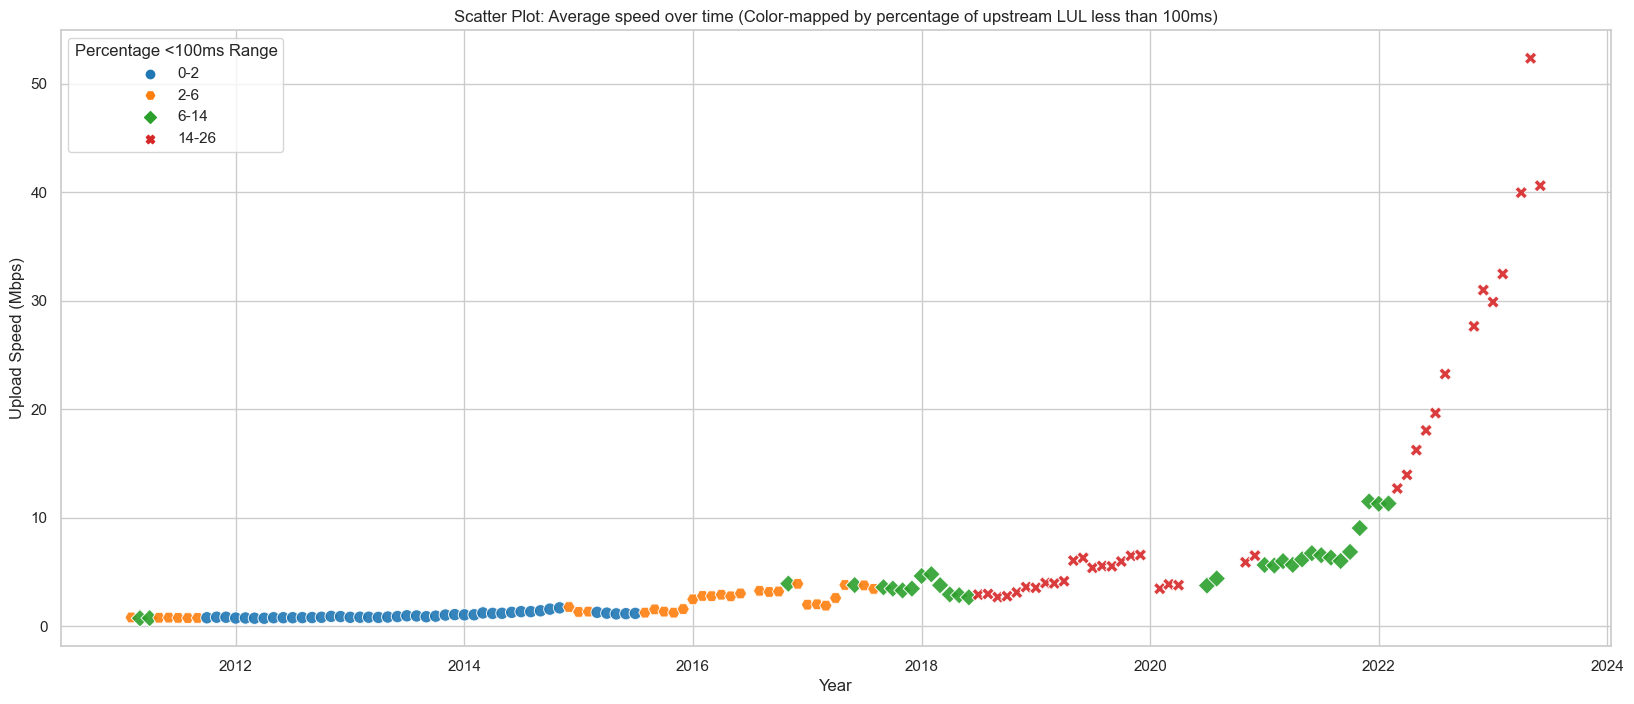

In [33]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage <100ms Range', style='Percentage <100ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL less than 100ms)')
plt.show()

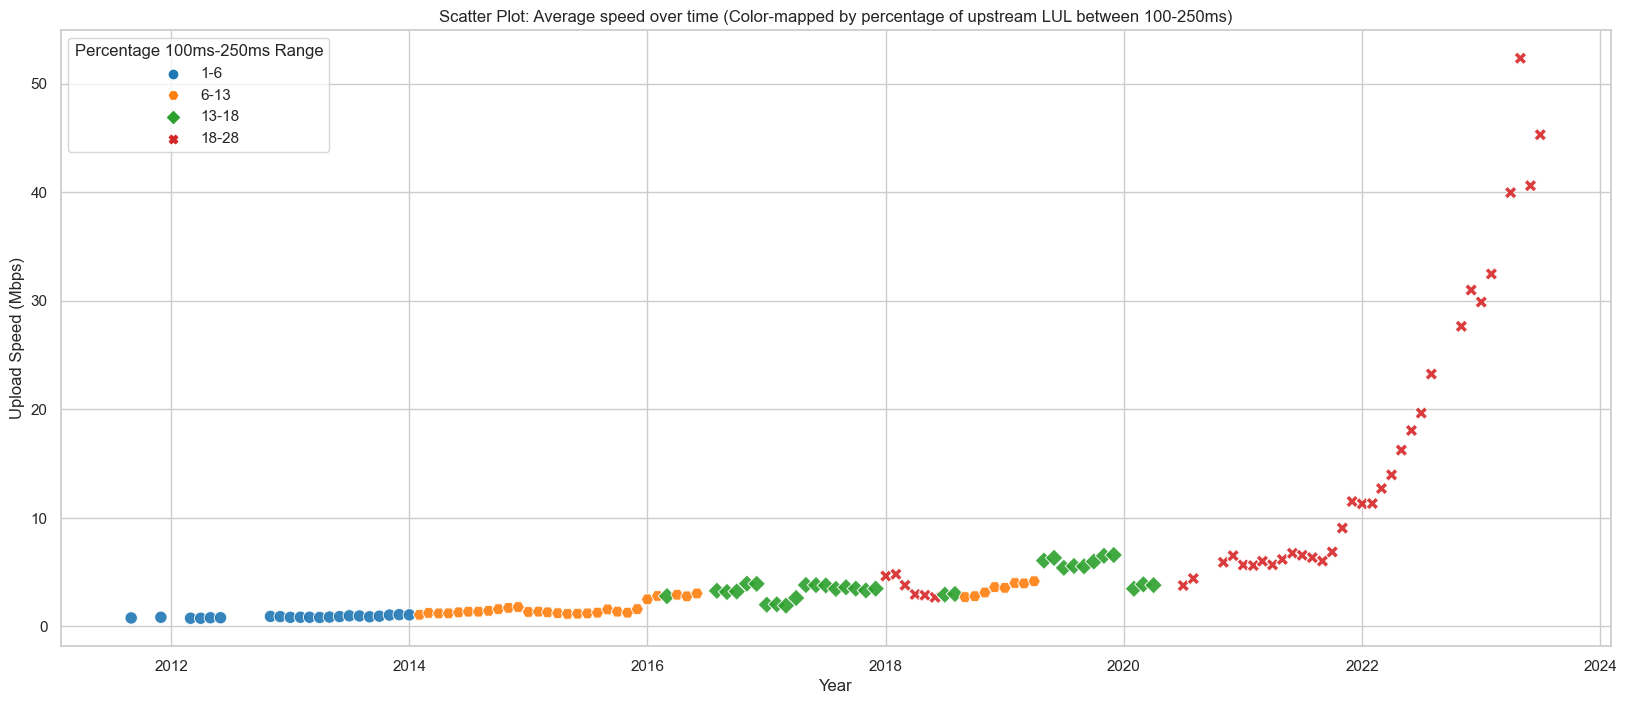

In [34]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage 100ms-250ms Range', style='Percentage 100ms-250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL between 100-250ms)')
plt.show()

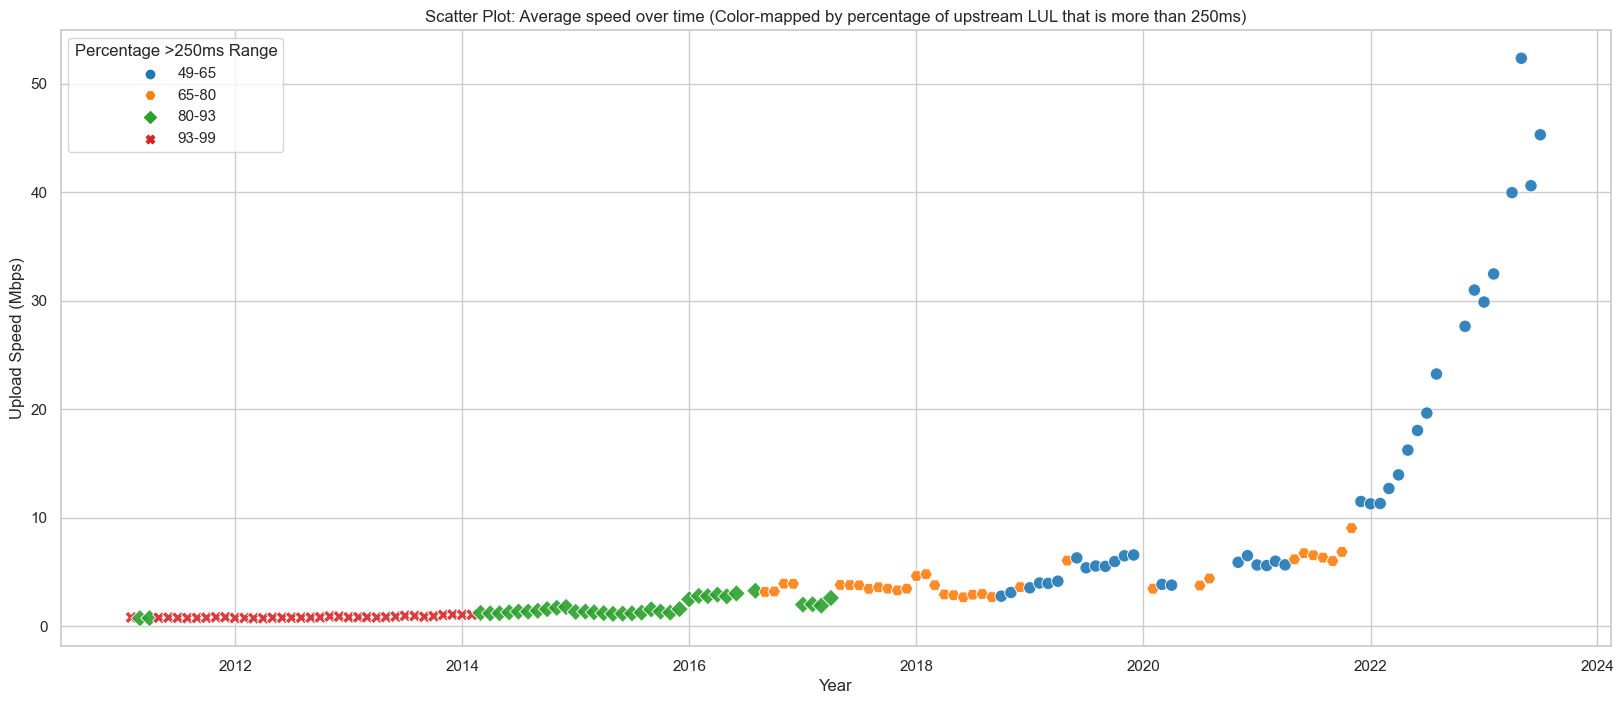

In [35]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='Percentage >250ms Range', style='Percentage >250ms Range' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by percentage of upstream LUL that is more than 250ms)')
plt.show()